In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [4]:
data = pd.read_csv("banana_quality.csv")
data.head(10)

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good
5,-2.807722,1.138136,3.447627,-1.713302,-2.220912,2.079410,2.281203,Good
6,-0.230208,2.783471,1.681184,-0.529779,-1.958468,1.348143,2.181766,Good
7,-1.348515,3.232281,4.011817,-0.890606,-0.031994,2.395917,1.042878,Good
8,-2.012226,1.928034,0.698746,-0.959772,-1.349721,1.311802,1.048762,Good
9,0.053035,1.309993,-0.264139,-2.969297,0.303983,3.889359,1.931332,Good


In [5]:
data.tail()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
7995,-6.414403,0.723565,1.134953,2.952763,0.297928,-0.156946,2.398091,Bad
7996,0.851143,-2.217875,-2.812175,0.489249,-1.323410,-2.316883,2.113136,Bad
7997,1.422722,-1.907665,-2.532364,0.964976,-0.562375,-1.834765,0.697361,Bad
7998,-2.131904,-2.742600,-1.008029,2.126946,-0.802632,-3.580266,0.423569,Bad
7999,-2.660879,-2.044666,0.159026,1.499706,-1.581856,-1.605859,1.435644,Bad


In [6]:
data.info()
data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


,count,mean,std,min,25%,50%,75%,max
Size,8000.0,-0.747802,2.136023,-7.998074,-2.277651,-0.897514,0.654216,7.970800
Weight,8000.0,-0.761019,2.015934,-8.283002,-2.223574,-0.868659,0.775491,5.679692
Sweetness,8000.0,-0.770224,1.948455,-6.434022,-2.107329,-1.020673,0.311048,7.539374
Softness,8000.0,-0.014441,2.065216,-6.959320,-1.590458,0.202644,1.547120,8.241555
HarvestTime,8000.0,-0.751288,1.996661,-7.570008,-2.120659,-0.934192,0.507326,6.293280
Ripeness,8000.0,0.781098,2.114289,-7.423155,-0.574226,0.964952,2.261650,7.249034
Acidity,8000.0,0.008725,2.293467,-8.226977,-1.629450,0.098735,1.682063,7.411633


In [7]:
data.isnull().sum()

Size           0
Weight         0
Sweetness      0
Softness       0
HarvestTime    0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
import seaborn as sns

<Axes: xlabel='Quality', ylabel='count'>

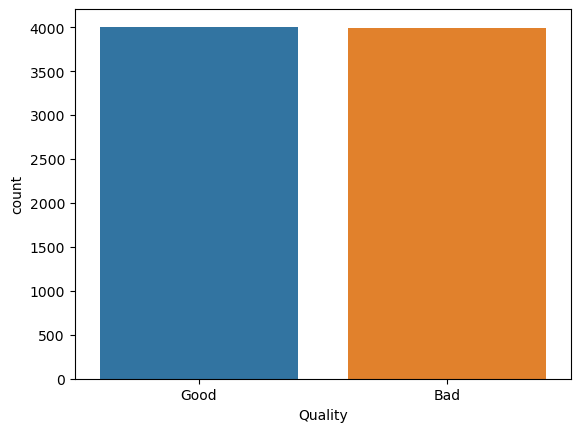

In [10]:
sns.countplot(x='Quality', data=data)

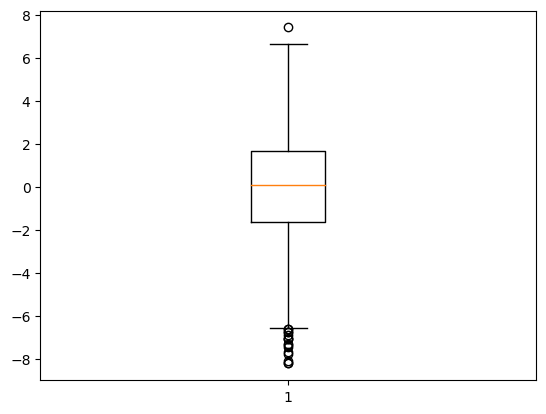

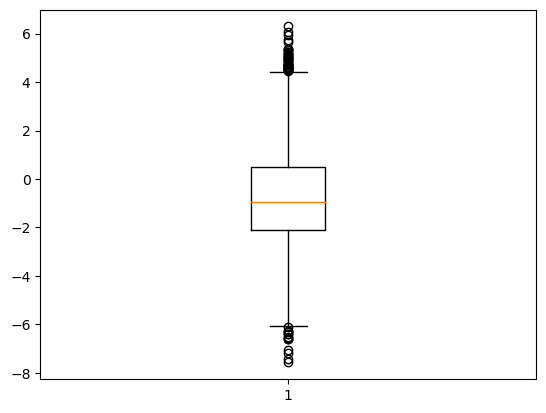

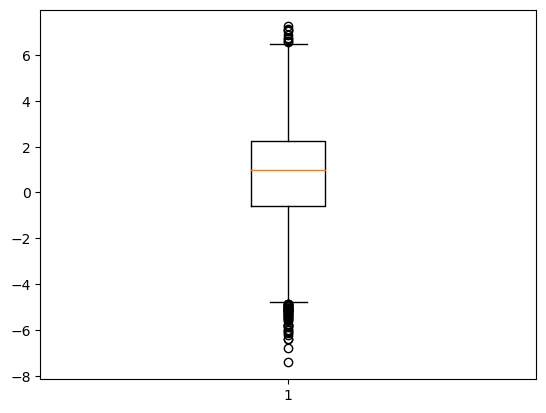

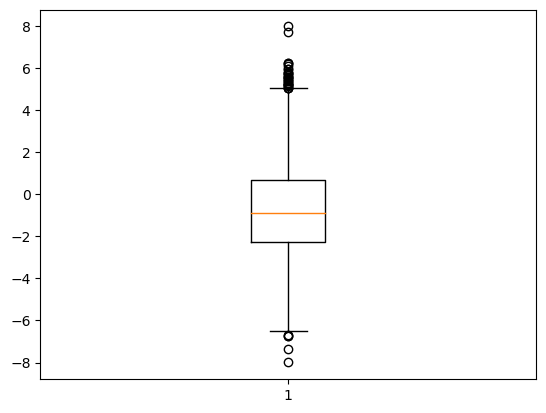

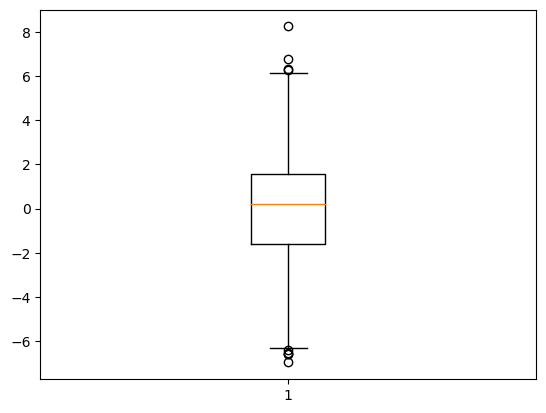

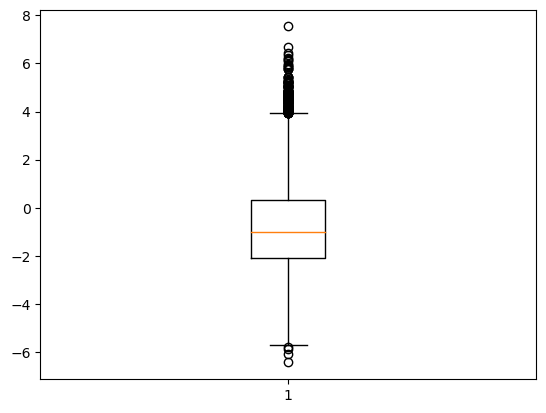

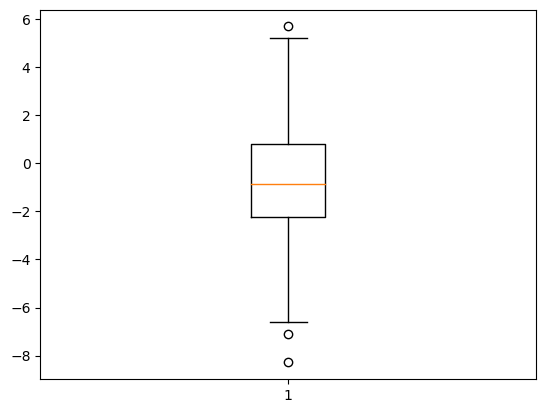

In [11]:
plt.boxplot(data['Acidity'])
plt.show()
plt.boxplot(data['HarvestTime'])
plt.show()
# plt.boxplot(data['Quality'])
# plt.show()
plt.boxplot(data['Ripeness'])
plt.show()
plt.boxplot(data['Size'])
plt.show()
plt.boxplot(data['Softness'])
plt.show()
plt.boxplot(data['Sweetness'])
plt.show()
plt.boxplot(data['Weight'])
plt.show()

In [12]:
specific_columns = ['Weight', 'Size', 'Sweetness','Ripeness','Acidity']

# Calculate the mean of the specific columns
column_median = data[specific_columns].median()
column_median

Weight      -0.868659
Size        -0.897514
Sweetness   -1.020673
Ripeness     0.964952
Acidity      0.098735
dtype: float64

In [13]:
nan_value = np.nan
outlier_count = {}

for column_name in ['Weight', 'Size', 'Sweetness', 'Ripeness', 'Acidity']:
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define the boundary for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = (data[column_name] < lower_bound) | (data[column_name] > upper_bound)
    outlier_count[column_name] = outliers.sum()

    # Replace the outliers with NaN
    data[column_name] = np.where(outliers, nan_value, data[column_name])

# Print outlier counts
for column_name, count in outlier_count.items():
    print(f"Number of outliers in {column_name}: {count}")

# Assuming df is your DataFrame and 'column_name' is the column for which you want to check outliers
new_data = data

Number of outliers in Weight: 3
Number of outliers in Size: 36
Number of outliers in Sweetness: 178
Number of outliers in Ripeness: 58
Number of outliers in Acidity: 17


In [14]:
new_data.describe()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
count,7964.000000,7997.000000,7822.000000,8000.000000,8000.000000,7942.000000,7983.000000
mean,-0.768905,-0.760091,-0.888492,-0.014441,-0.751288,0.812691,0.022484
std,2.096149,2.012019,1.785470,2.065216,1.996661,2.053545,2.270670
min,-6.516209,-6.609340,-5.708583,-6.959320,-7.570008,-4.795906,-6.564504
25%,-2.279757,-2.222620,-2.132802,-1.590458,-2.120659,-0.546699,-1.618516
50%,-0.905255,-0.867235,-1.060049,0.202644,-0.934192,0.976673,0.106756
75%,0.638578,0.775318,0.181574,1.547120,0.507326,2.264843,1.684972
max,5.026874,5.184198,3.932443,8.241555,6.293280,6.490461,6.630081


In [15]:
# Show the number of Nan value
new_data.isna().sum()

Size            36
Weight           3
Sweetness      178
Softness         0
HarvestTime      0
Ripeness        58
Acidity         17
Quality          0
dtype: int64

In [16]:
specific_columns = ['Weight', 'Size', 'Sweetness','Ripeness','Acidity']

# Calculate the mean of the specific columns
column_meadian = new_data[specific_columns].median()
column_median

Weight      -0.868659
Size        -0.897514
Sweetness   -1.020673
Ripeness     0.964952
Acidity      0.098735
dtype: float64

In [17]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         7964 non-null   float64
 1   Weight       7997 non-null   float64
 2   Sweetness    7822 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     7942 non-null   float64
 6   Acidity      7983 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


In [18]:

new_data.describe()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
count,7964.000000,7997.000000,7822.000000,8000.000000,8000.000000,7942.000000,7983.000000
mean,-0.768905,-0.760091,-0.888492,-0.014441,-0.751288,0.812691,0.022484
std,2.096149,2.012019,1.785470,2.065216,1.996661,2.053545,2.270670
min,-6.516209,-6.609340,-5.708583,-6.959320,-7.570008,-4.795906,-6.564504
25%,-2.279757,-2.222620,-2.132802,-1.590458,-2.120659,-0.546699,-1.618516
50%,-0.905255,-0.867235,-1.060049,0.202644,-0.934192,0.976673,0.106756
75%,0.638578,0.775318,0.181574,1.547120,0.507326,2.264843,1.684972
max,5.026874,5.184198,3.932443,8.241555,6.293280,6.490461,6.630081


In [19]:
# Specify the columns for which you want to replace NaN values with the mean
columns_to_fill = ['Weight', 'Size', 'Sweetness','Ripeness','Acidity']

# Calculate the mean of the specified columns
column_means = new_data[columns_to_fill].median()

# Replace NaN values with the mean for each respective column
data[columns_to_fill] = new_data[columns_to_fill].fillna(column_median)


In [20]:
# Display the DataFrame after replacing NaN values
data.isna().sum()

Size           0
Weight         0
Sweetness      0
Softness       0
HarvestTime    0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

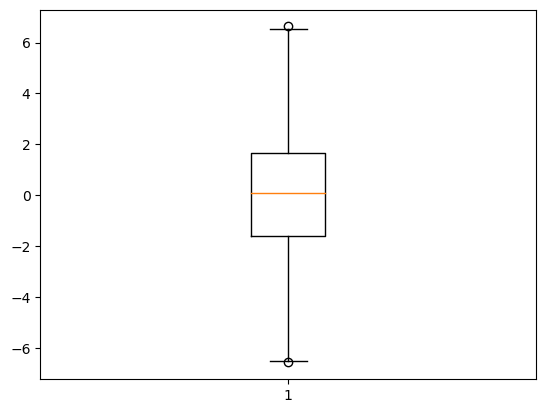

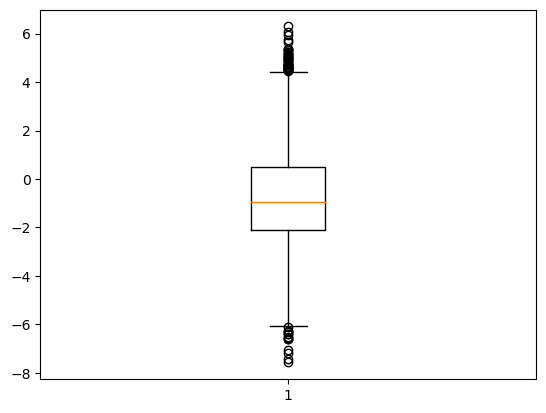

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

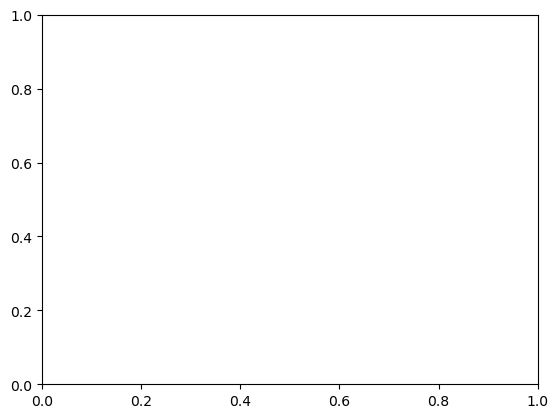

In [21]:
plt.boxplot(data['Acidity'])
plt.show()
plt.boxplot(data['HarvestTime'])
plt.show()
plt.boxplot(data['Quality'])
plt.show()
plt.boxplot(data['Ripeness'])
plt.show()
plt.boxplot(data['Size'])
plt.show()
plt.boxplot(data['Softness'])
plt.show()
plt.boxplot(data['Sweetness'])
plt.show()
plt.boxplot(data['Weight'])
plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
new_data['Quality_encoded'] = label_encoder.fit_transform(new_data['Quality'])

In [23]:
new_data['Quality_encoded'].unique()

array([1, 0])

In [24]:
from sklearn.model_selection import train_test_split

# Specify the columns you want to include in the features
feature_columns = ['Weight', 'Size', 'Sweetness', 'Ripeness', 'Acidity']
label = 'Quality_encoded'

# Extract the features and the target variable
X = new_data[feature_columns]  # Features
y = new_data[label]  # Target
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_train,X_test

(        Weight      Size  Sweetness  Ripeness   Acidity
 1467  1.352598 -1.022637   2.166527  1.798778  3.606898
 5768 -0.716299  1.506011  -1.649398  0.953233 -2.082510
 5714 -2.733094  2.337325  -1.844521  0.459577 -2.012927
 1578  1.761035 -2.040307   2.782780  0.886389  1.003219
 6958 -1.239019 -2.599652  -1.282005 -1.251541  1.678779
 ...        ...       ...        ...       ...       ...
 5226 -2.695930  0.323835  -0.175959  1.777267 -3.199724
 5390 -0.558582  1.015700  -1.833480 -0.033990  0.540286
 860   1.462492 -2.327883   2.726482  0.416074  0.647311
 7603 -1.480548  1.266055  -4.757917 -1.837556  3.323480
 7270 -6.185589 -1.368017  -3.241598 -1.328053 -1.601291
 
 [6400 rows x 5 columns],
         Weight      Size  Sweetness  Ripeness   Acidity
 2215 -1.523354 -1.182375  -1.390901  2.331215 -1.828672
 2582 -2.809086 -2.190222  -1.394417  5.537467 -4.940843
 1662  1.187556 -0.017423  -1.020673 -1.043487  2.541676
 3027 -1.913664 -0.266446  -1.837349  3.520379 -1.527580
 43

In [26]:
from sklearn.linear_model import LogisticRegression
logistic_model =LogisticRegression()
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [27]:
#accuracy test
from sklearn.metrics import accuracy_score
y_pred = logistic_model.predict(X_test)
#Evaluate the model
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy*100}%")

Accuracy: 83.9375%


In [28]:
X_test_list = X_test.iloc[0]

In [29]:
X_test_list

Weight      -1.523354
Size        -1.182375
Sweetness   -1.390901
Ripeness     2.331215
Acidity     -1.828672
Name: 2215, dtype: float64

In [30]:
y_pre = logistic_model.predict([X_test_list])
y_pre

/Users/arun/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [31]:
label_encoder.inverse_transform(y_pre)

array(['Bad'], dtype=object)

In [33]:
import pickle

with open('logistic_regression_model.pkl','wb')as f:
    pickle.dump(logistic_model,f)
with open('labe_encoder.pkl','wb') as f:
    pickle.dump(label_encoder,f)